# **Activity 7.01**
# **Building a Convolutional Neural Network with More ANN Layers**  

In thie activity for this Chapter, you’ll be putting all that you’ve learned to use as you build your own classifier with the CIFAR100. The CIFAR100 is 

Here's some code to get you started. Remember you can go back to previous exercises for guidance if needed. Good luck!


**1. Import Tensorflow**

In [0]:
!pip install tensorflow

In [1]:
import tensorflow as tf

**2. Check TensorFlow version**

In [2]:
print(tf.__version__)

2.5.0


**3. Import additional libraries.**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt


**4. Load the CIFAR100 dataset.**

In [4]:
cifar100 = tf.keras.datasets.cifar100

(x_train, y_train), (x_test, y_test) = cifar100.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)


169009152/169001437 [==============================] - 6s 0us/step
x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


**5. Check the number of classes.**

In [5]:
K = len(set(y_train))
print("number of classes:", K)


number of classes: 100


**6. Build the model.**

In [6]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)


2021-08-03 13:24:08.240059: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


**7. Compile the model.**

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)


2021-08-03 13:24:09.265943: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15
1563/1563 [==============================] - 24s 15ms/step - loss: 3.8307 - accuracy: 0.1151 - val_loss: 3.3304 - val_accuracy: 0.2031
Epoch 2/15
1563/1563 [==============================] - 24s 15ms/step - loss: 3.2589 - accuracy: 0.2122 - val_loss: 3.0132 - val_accuracy: 0.2622
Epoch 3/15
1563/1563 [==============================] - 26s 17ms/step - loss: 2.9998 - accuracy: 0.2588 - val_loss: 2.8120 - val_accuracy: 0.3102
Epoch 4/15
1563/1563 [==============================] - 24s 16ms/step - loss: 2.8178 - accuracy: 0.2948 - val_loss: 2.7005 - val_accuracy: 0.3379
Epoch 5/15
1563/1563 [==============================] - 24s 15ms/step - loss: 2.6735 - accuracy: 0.3229 - val_loss: 2.6479 - val_accuracy: 0.3414
Epoch 6/15
1563/1563 [==============================] - 24s 15ms/step - loss: 2.5556 - accuracy: 0.3466 - val_loss: 2.5857 - val_accuracy: 0.3553
Epoch 7/15
1563/1563 [==============================] - 23s 15ms/step - loss: 2.4515 - accuracy: 0.3673 - val_loss: 2.5320 -

**8. Plot loss.**

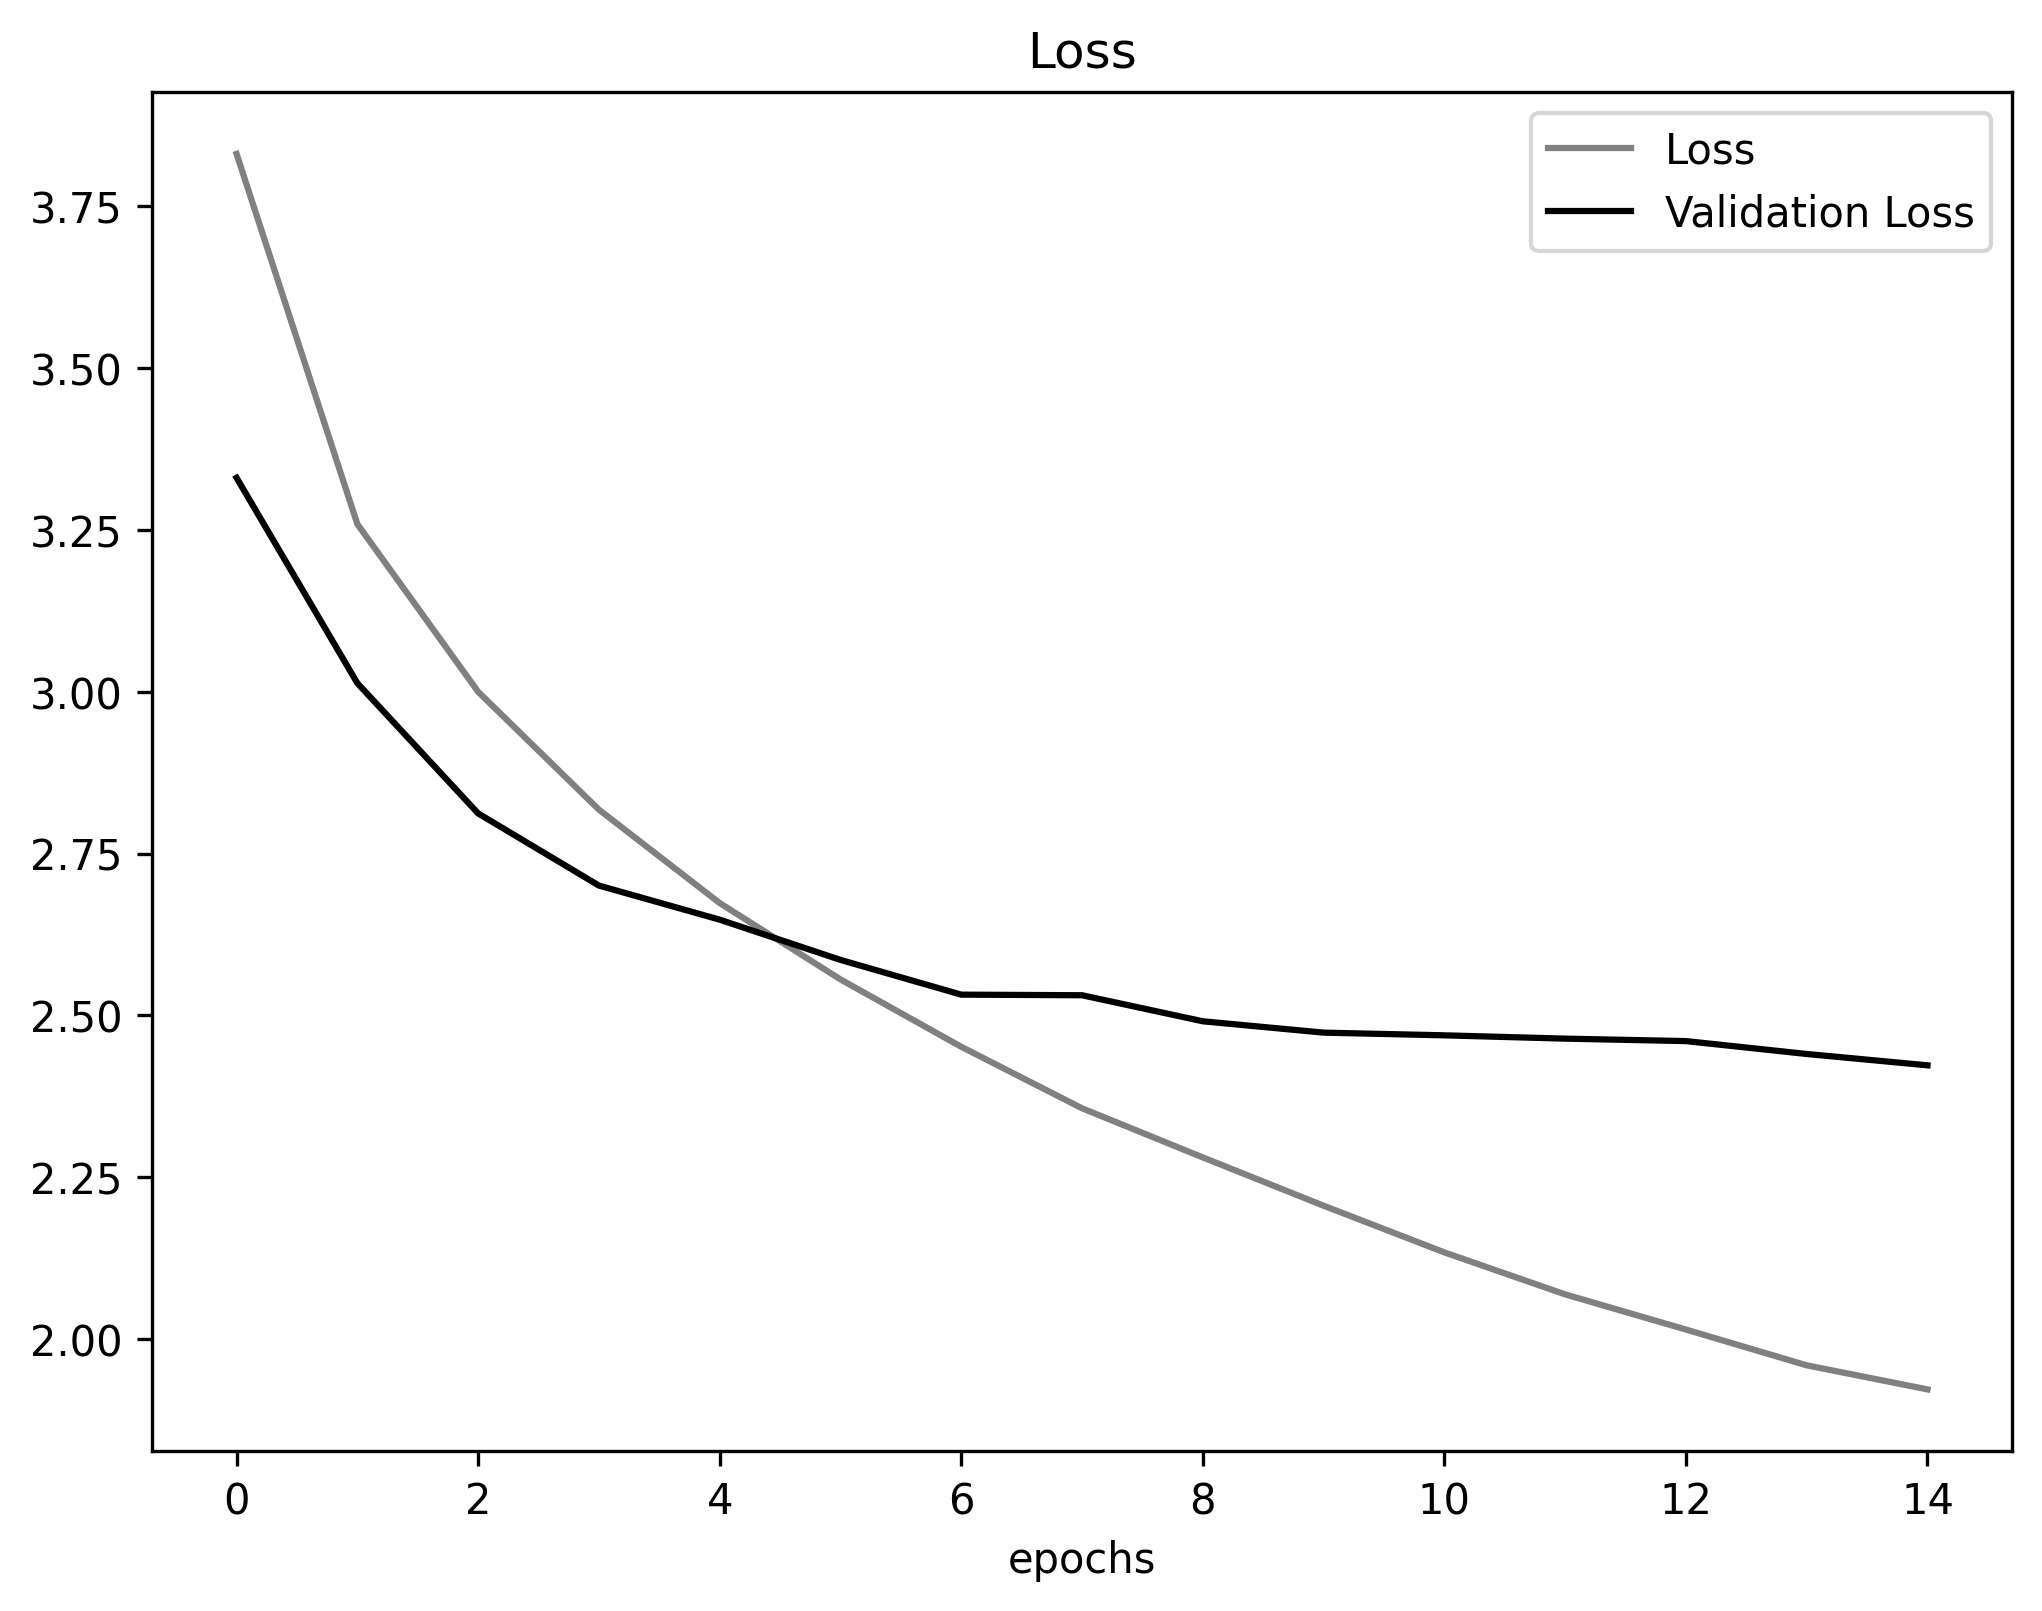

In [8]:
plt.figure(figsize=(8,6), dpi=300)
plt.plot(r.history['loss'], label='Loss', color='gray')
plt.plot(r.history['val_loss'], label='Validation Loss', color='k')
plt.legend()
plt.title('Loss')
plt.xlabel('epochs')

**9. Plot accuracy**

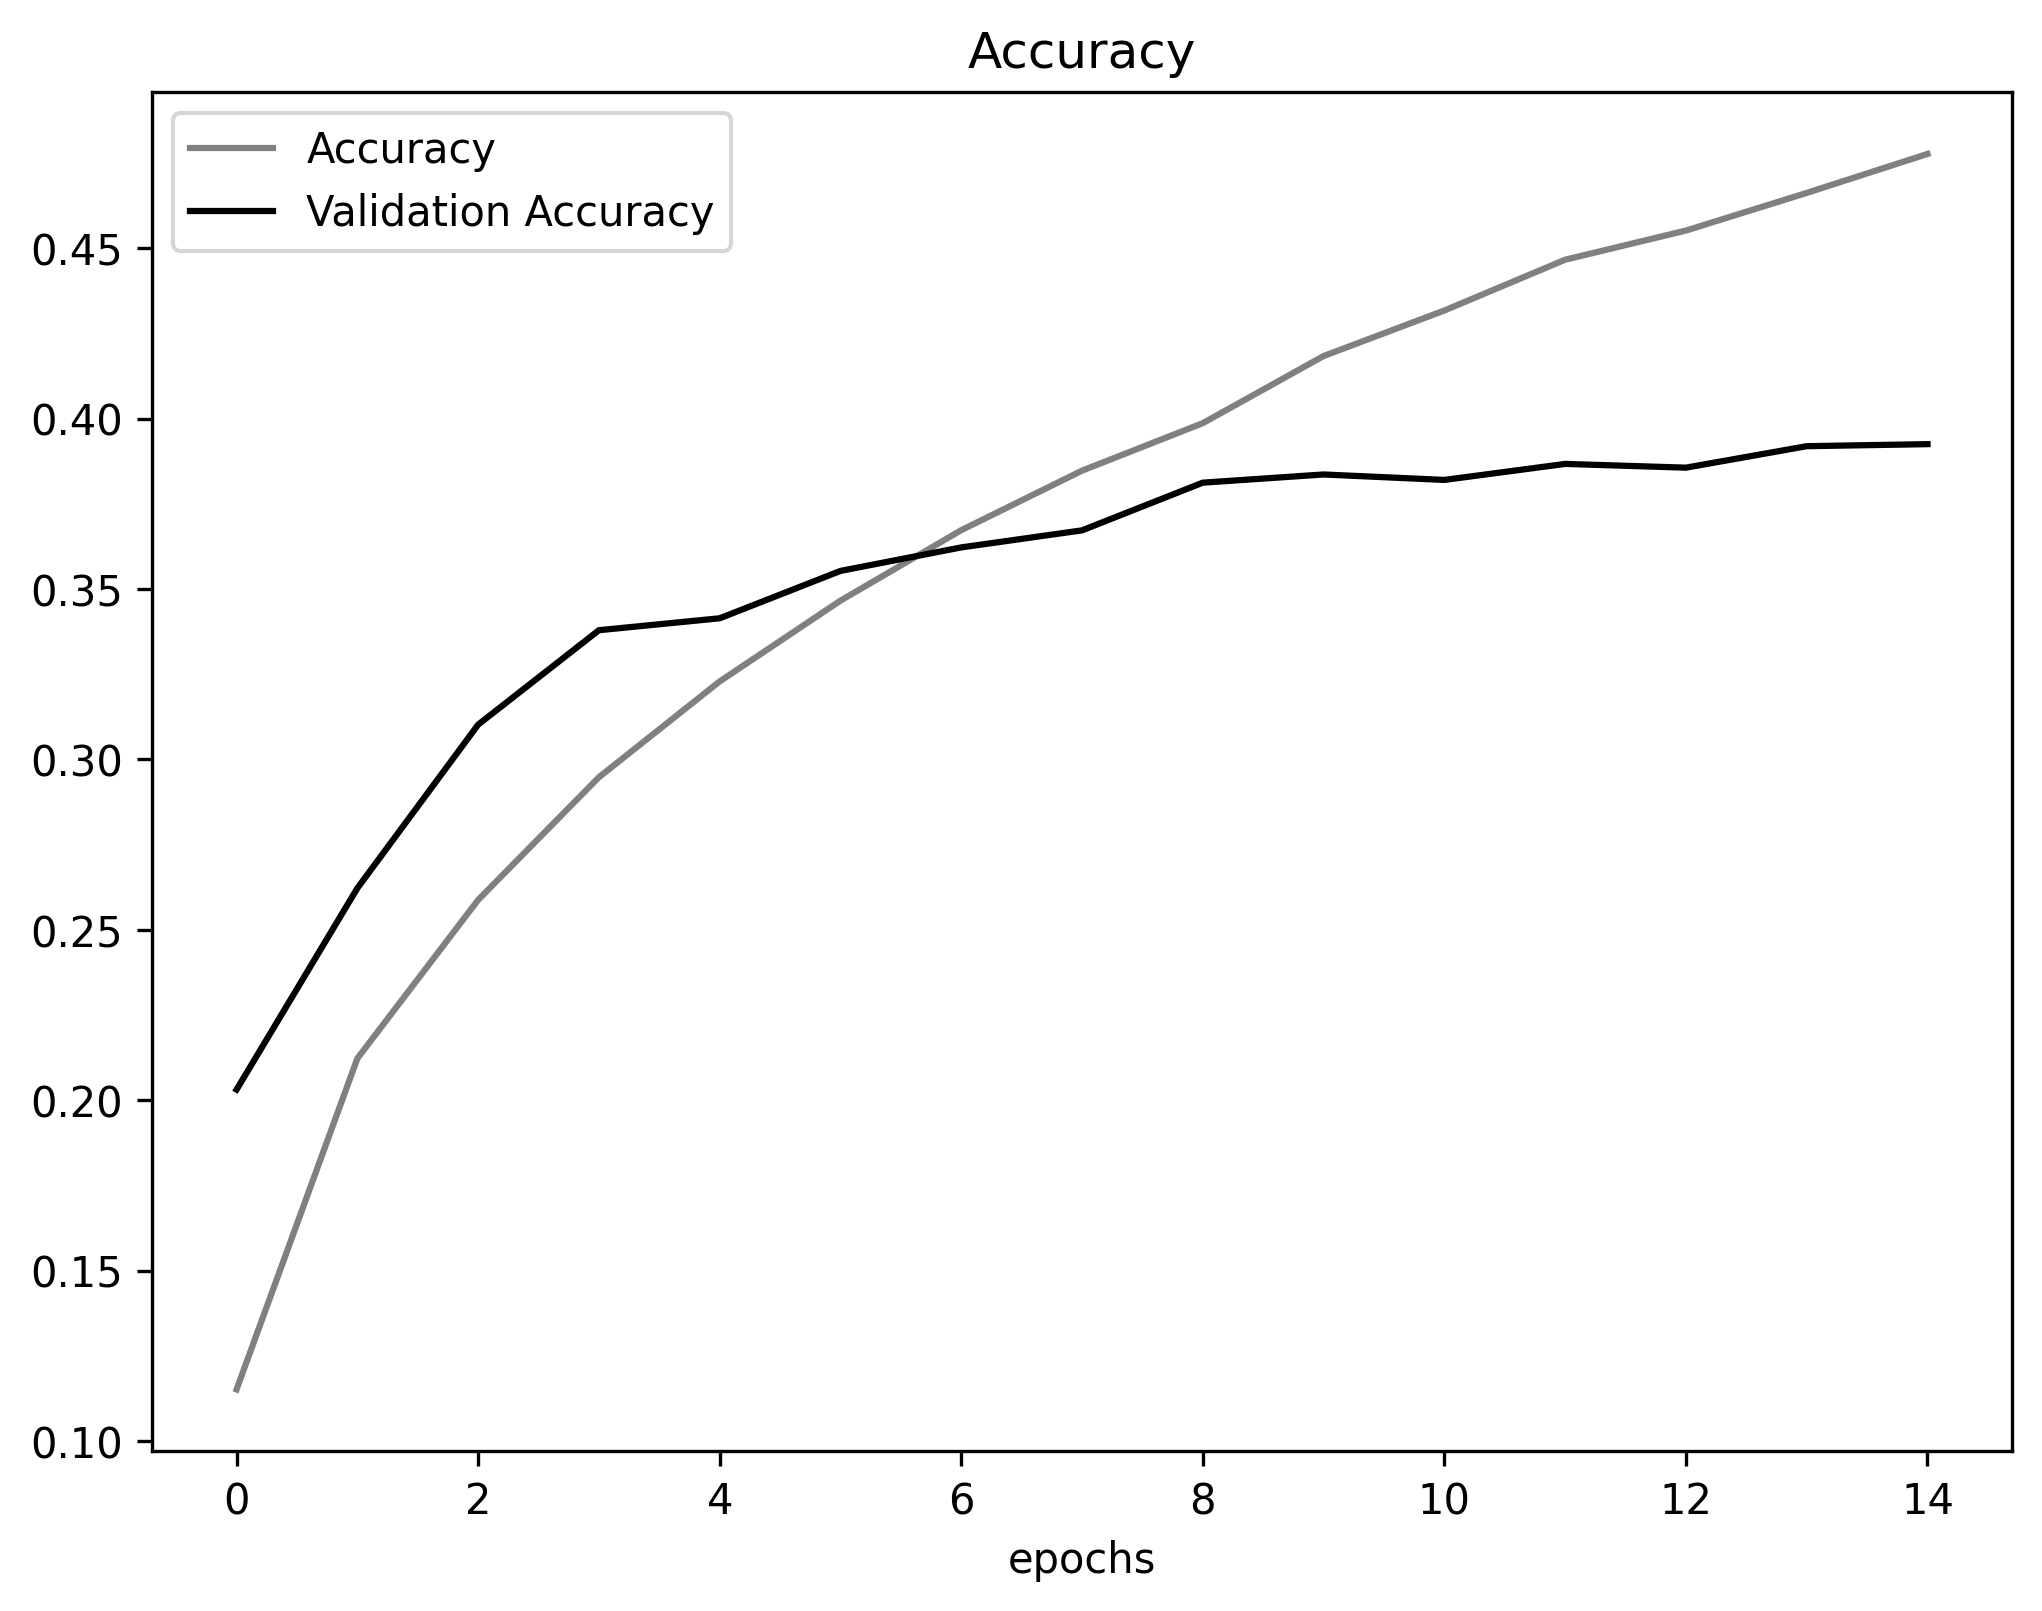

In [9]:
plt.figure(figsize=(8,6), dpi=300)
plt.plot(r.history['accuracy'], label='Accuracy', color='gray')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy', color='k')
plt.legend()
plt.title('Accuracy')
plt.xlabel('epochs')

**11. Label mapping.**

In [10]:
labels = '''beaver, dolphin, otter, seal, whale
	aquarium fish, flatfish, ray, shark, trout
	orchids, poppies, roses, sunflowers, tulips
	bottles, bowls, cans, cups, plates
	apples, mushrooms, oranges, pears, sweet peppers
	clock, computer keyboard, lamp, telephone, television
	bed, chair, couch, table, wardrobe
	bee, beetle, butterfly, caterpillar, cockroach
	bear, leopard, lion, tiger, wolf
	bridge, castle, house, road, skyscraper
	cloud, forest, mountain, plain, sea
	camel, cattle, chimpanzee, elephant, kangaroo
	fox, porcupine, possum, raccoon, skunk
	crab, lobster, snail, spider, worm
	baby, boy, girl, man, woman
	crocodile, dinosaur, lizard, snake, turtle
	hamster, mouse, rabbit, shrew, squirrel
	maple, oak, palm, pine, willow
	bicycle, bus, motorcycle, pickup truck, train
	lawn-mower, rocket, streetcar, tank, tractor'''.split()


**12. Check random incorrectly classified image.**

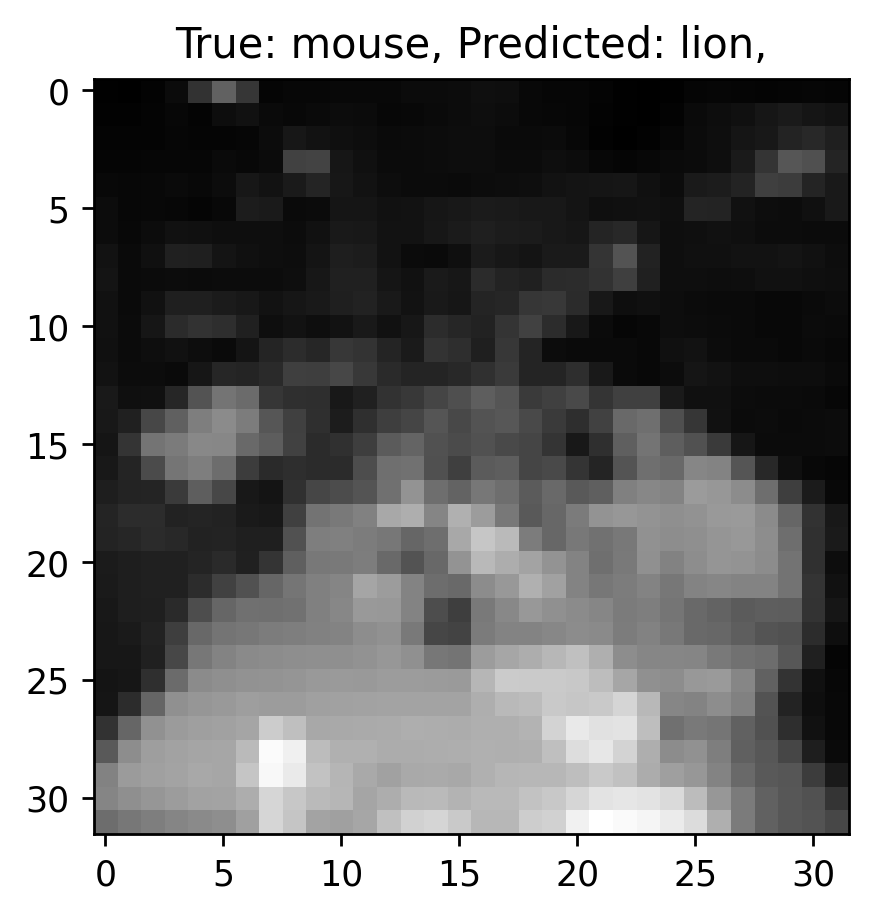

In [22]:
pred_test = model.predict(x_test).argmax(axis=1)
wrong = np.where(pred_test != y_test)[0]
i = np.random.choice(wrong)
plt.figure(figsize=(4,4), dpi=250)
plt.imshow(x_test[i,:,:,1], cmap='gray')
plt.title("True: %s Predicted: %s" % (labels[y_test[i]], labels[pred_test[i]]));